
# General Ledger vs Trial Balance Reconciliation Project

## 1. Introduction

Financial reconciliation is a critical process in accounting and auditing, ensuring that detailed transactional records align with summarized financial statements.  
One of the most fundamental reconciliation checks performed in organizations is the comparison between the **General Ledger (GL)** and the **Trial Balance (TB)**.

The **General Ledger** contains individual transaction-level entries recorded across various accounts, while the **Trial Balance** provides an aggregated view of these accounts and serves as the foundation for preparing financial statements.

Inaccuracies between the GL and TB can arise due to:
- Missing or duplicated transactions  
- Incorrect account postings  
- Aggregation or reporting errors  
- Timing differences  

Such discrepancies, if left unresolved, can lead to **misstated financial reports** and compliance risks.

---

### Project Objective

The objective of this project is to:
- Perform an automated reconciliation between the General Ledger and Trial Balance
- Identify mismatches in account balances
- Highlight missing or inconsistent records
- Provide a clear and interpretable reconciliation summary

This project simulates a **real-world finance and audit use case**, demonstrating how data analysis and programming can be applied to improve accuracy, efficiency, and transparency in financial reporting.

---

### Tools & Technologies Used

- **Python**
- **Pandas & NumPy**
- **Jupyter Notebook**

The datasets used in this project are simulated but designed to closely resemble real financial data structures commonly used in corporate accounting systems.


## 2. Data Description

This project uses two datasets representing core financial accounting records commonly used in organizations.  
Due to the confidential nature of real financial data, the datasets used here are **simulated but structured to closely resemble real-world General Ledger and Trial Balance data**.

---

### 2.1 General Ledger (GL)

The General Ledger contains **transaction-level accounting entries**.  
Each record represents an individual financial transaction posted to a specific account.

**Columns:**
- **transaction_id**: Unique identifier for each transaction  
- **account_code**: Ledger account code (e.g., Cash, Revenue, Expenses)  
- **date**: Date on which the transaction was recorded  
- **amount**: Transaction amount  
  - Positive values represent debits  
  - Negative values represent credits  

The GL dataset serves as the **source of truth** for all financial activity.

---

### 2.2 Trial Balance (TB)

The Trial Balance is an **aggregated summary of the General Ledger**, showing total balances per account.

**Columns:**
- **account_code**: Ledger account code  
- **tb_amount**: Total balance for each account as reported in the Trial Balance  

The Trial Balance is typically used as the basis for preparing financial statements.

---

### 2.3 Reconciliation Objective

The objective of this reconciliation is to verify that:
- All General Ledger transactions are correctly reflected in the Trial Balance
- Aggregated balances from the GL match the corresponding Trial Balance amounts

Any discrepancies identified may indicate **missing transactions, posting errors, or aggregation issues**, which could impact the accuracy of financial reporting.


## 3. Importing Libraries & Loading Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
gl = pd.read_csv("General_Ledger.csv")
tb = pd.read_csv("Trial_Balance.csv")


## 4. Initial Data Validation

In [18]:
#Shape & Preview
gl.head()
tb.head()

,transaction_id,account_code,date,amount
0,TXN001,1001,2024-01-01,50000
1,TXN002,1001,2024-01-05,-12000
2,TXN003,2001,2024-01-06,-30000
3,TXN004,3001,2024-01-07,8000
4,TXN005,3001,2024-01-10,4000


,account_code,tb_amount
0,1001,53000
1,2001,-54000
2,3001,17000
3,4001,10000


In [10]:
#Null & Duplicate Checks
gl.isnull().sum()
tb.isnull().sum()

transaction_id    0
account_code      0
date              0
amount            0
dtype: int64

account_code    0
tb_amount       0
dtype: int64

In [12]:
gl.duplicated().sum()

0

## 5. Data Preparation

In [14]:
#Aggregating General Ledger Data
'''Since the Trial Balance represents summarized balances, the GL data must be aggregated at the account level'''

gl_sum = (
    gl.groupby("account_code")["amount"]
    .sum()
    .reset_index()
    .rename(columns={"amount": "gl_amount"})
)
gl_sum

'Since the Trial Balance represents summarized balances, the GL data must be aggregated at the account level'

,account_code,gl_amount
0,1001,53000
1,2001,-55000
2,3001,18000
3,4001,10000
4,5001,-7000


## 6.Reconciliation Methodology

In [27]:
#Merging GL Summary with Trial Balance
merge=pd.merge(gl_sum,tb,on="account_code",how="outer")
merge

,account_code,gl_amount,tb_amount
0,1001,53000,53000.0
1,2001,-55000,-54000.0
2,3001,18000,17000.0
3,4001,10000,10000.0
4,5001,-7000,NaN


In [29]:
#Handling Missing Values
merge.fillna(0,inplace=True)
merge

,account_code,gl_amount,tb_amount
0,1001,53000,53000.0
1,2001,-55000,-54000.0
2,3001,18000,17000.0
3,4001,10000,10000.0
4,5001,-7000,0.0


In [39]:
#Identifying Matches & Mismatches
merge["Difference"]=merge["gl_amount"]-merge["tb_amount"]
merge["Merge_Status"]=np.where(merge["Difference"]==0,"Matched","Mismatch")
merge

,account_code,gl_amount,tb_amount,Difference,Merge_Status
0,1001,53000,53000.0,0.0,Matched
1,2001,-55000,-54000.0,-1000.0,Mismatch
2,3001,18000,17000.0,1000.0,Mismatch
3,4001,10000,10000.0,0.0,Matched
4,5001,-7000,0.0,-7000.0,Mismatch


## 7. Reconciliation Results

In [40]:
#Summary of Results
merge["Merge_Status"].value_counts()

Merge_Status
Mismatch    3
Matched     2
Name: count, dtype: int64

In [41]:
#Mismatched Accounts
mismatch=merge[merge["Merge_Status"]=="Mismatch"]
mismatch

,account_code,gl_amount,tb_amount,Difference,Merge_Status
1,2001,-55000,-54000.0,-1000.0,Mismatch
2,3001,18000,17000.0,1000.0,Mismatch
4,5001,-7000,0.0,-7000.0,Mismatch


## 8. Discrepancy Analysis

In [43]:
#Total Value of Differences
mismatch["Difference"].sum()

-7000.0

<Figure size 1000x500 with 0 Axes>

<Axes: xlabel='account_code', ylabel='Difference'>

Text(0.5, 1.0, 'Account-wise Reconciliation Differences')

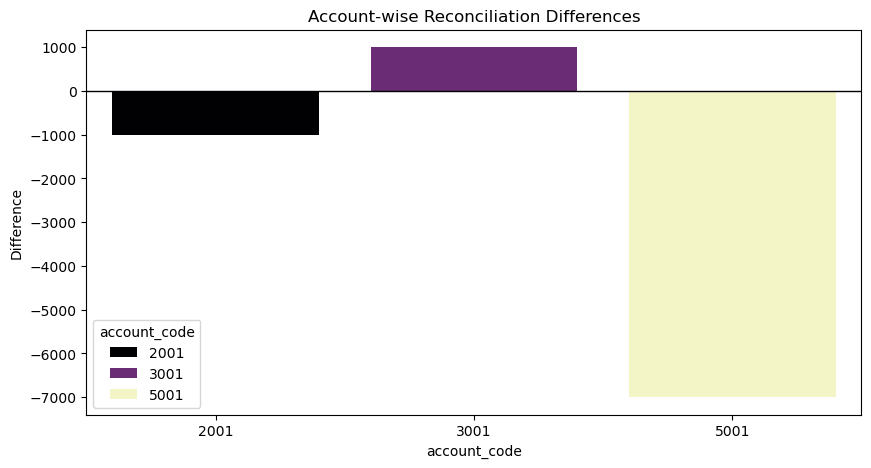

In [59]:
#Visualization of Discrepancies
plt.figure(figsize=(10,5));
sns.barplot(
    data=mismatch,
    x="account_code",
    y="Difference",
    palette="magma",hue="account_code"
);
plt.axhline(y=0, color='black', linestyle='-', linewidth=1);
plt.title("Account-wise Reconciliation Differences");
plt.show()


## 9. Reconciliation Findings

After performing the reconciliation between the General Ledger and the Trial Balance, the following observations were identified:

- Accounts marked as **Matched** indicate that the total transaction-level amounts recorded in the General Ledger perfectly align with the summarized balances reported in the Trial Balance.
- Accounts marked as **Mismatch** represent discrepancies where the GL balance does not equal the TB balance.
- The calculated **difference** column quantifies the exact magnitude of mismatch for each affected account, enabling targeted investigation.

These discrepancies may arise due to:
- Missing or duplicated journal entries  
- Incorrect account postings  
- Errors during aggregation or reporting  
- Timing differences between transaction posting and reporting  

Identifying such mismatches early is critical to maintaining accurate financial records and ensuring data reliability for downstream reporting.


## 10. Business Impact & Value

This reconciliation process delivers significant value from both a business and audit perspective:

- **Improved Financial Accuracy:** Ensures that summarized financial reports are supported by complete and accurate transactional data.
- **Risk Reduction:** Early detection of discrepancies helps prevent misstatements in financial statements and reduces audit risks.
- **Operational Efficiency:** Automating reconciliation reduces manual effort, minimizes human error, and accelerates month-end close processes.
- **Audit Readiness:** Provides clear, traceable evidence of financial validation, strengthening compliance and audit confidence.

By automating GL vs TB reconciliation using Python, this project demonstrates how data analytics can enhance traditional accounting controls and improve overall financial governance.


## 11. Conclusion

This project demonstrates a practical and real-world application of data analytics in finance by automating the reconciliation between the General Ledger and Trial Balance.

Through structured data validation, aggregation, comparison, and interpretation, the project highlights how discrepancies can be efficiently identified and analyzed using Python and Pandas.

The approach showcased here reflects common reconciliation procedures used in corporate finance, audit, and risk management functions, making this project highly relevant for roles in:
- Financial Analytics  
- Audit & Assurance  
- Risk & Compliance  
- Data Analytics in Finance  

Overall, this project illustrates how programming and domain knowledge can be combined to build scalable, accurate, and business-impactful financial controls.
